### Import Dependencies


In [34]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Import dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

### Data Processing

In [3]:
# Check the sizes of training and testing datasets 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


In [4]:
# Inspect y_train structure
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
# Flatten out y_train to remove unnecessary nested arrays
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
# List of all 10 categories
categories = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
# Normalize x's to range from 0-1 instead of 0-255
x_train = x_train / 255
x_test = x_test / 255

### Display

In [8]:
# Function to display an image from given dataset at given index

def sample_plot(x, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(x[index])
    plt.xlabel(categories[y[index]])

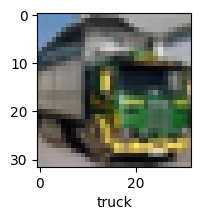

In [9]:
# Sample image
sample_plot(x_train, y_train, 14)

### Model

#### Testing ANN first

In [23]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3008 - loss: 1.9381
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4174 - loss: 1.6482
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4514 - loss: 1.5561
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4720 - loss: 1.4950
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4939 - loss: 1.4391


In [24]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4797 - loss: 1.4673


[1.4746856689453125, 0.47699999809265137]

In [26]:
# Classification Report for ANN

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.39      0.49      1000
           1       0.72      0.43      0.54      1000
           2       0.34      0.44      0.38      1000
           3       0.37      0.30      0.33      1000
           4       0.55      0.23      0.33      1000
           5       0.47      0.26      0.34      1000
           6       0.40      0.74      0.52      1000
           7       0.46      0.67      0.54      1000
           8       0.56      0.69      0.62      1000
           9       0.54      0.62      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



#### Testing CNN

In [32]:
cnn = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3865 - loss: 1.6822
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6051 - loss: 1.1343
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6588 - loss: 0.9772
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6978 - loss: 0.8753
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7239 - loss: 0.7966
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7484 - loss: 0.7298
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7673 - loss: 0.6683
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7793 - loss: 0.6325
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8024 - loss: 0.5709
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8134 - loss: 0.5263


In [33]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7105 - loss: 0.9073


[0.9218431115150452, 0.7053999900817871]

In [35]:
# Classification Report for CNN

y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      1000
           1       0.87      0.77      0.82      1000
           2       0.71      0.45      0.55      1000
           3       0.60      0.40      0.48      1000
           4       0.60      0.72      0.66      1000
           5       0.52      0.72      0.61      1000
           6       0.76      0.82      0.79      1000
           7       0.72      0.79      0.76      1000
           8       0.81      0.82      0.81      1000
           9       0.77      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

